In [70]:
import scanpy as sc

In [119]:
import matplotlib.pyplot as plt

In [35]:
adata = sc.datasets.pbmc3k()

In [37]:
#Preprocessing - Filtering
sc.pp.filter_cells(adata, min_genes=200) 
sc.pp.filter_genes(adata, min_cells=3)

In above block, we have filter cells, on the basis of minimum genes they express, ensuring we remove low-quality cells that hae too few detected genes.
and while filtering gene on the basis of minimum cell to ensure that we remove gene thats are detected in very few cells which might not be biologically relevant    

In [39]:
#Preprocessing : Normalizarion
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

in this block, normalize_total have target_sum means after normalization each cell will have same total gene count i.e. here is 10,000
and log1p, some gene have very high expression while other have very low, this fucntion applies log transformation to make numbers more balanced.

In [46]:
#Preprocessing : Identifying highly variable genes
adata = adata.copy()
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

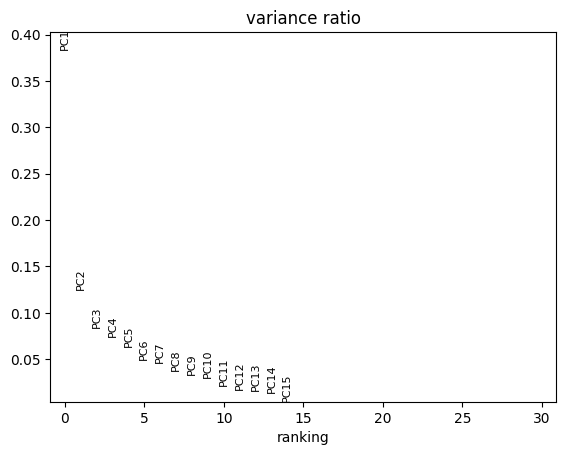

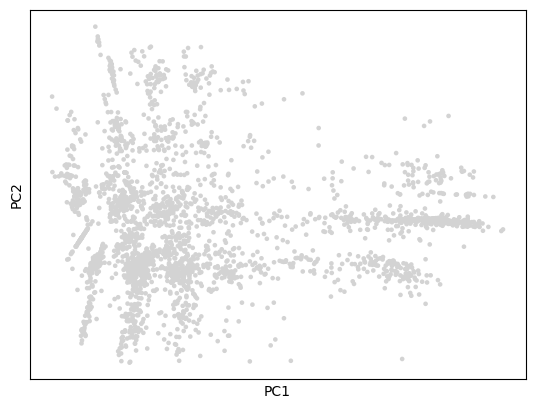

<Figure size 640x480 with 0 Axes>

In [121]:
#Visualization : PCA
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata)
sc.pl.pca(adata)



In [61]:
#finding neighbors
sc.pp.neighbors(adata)

In [71]:
#finding clusters
sc.tl.leiden(adata)

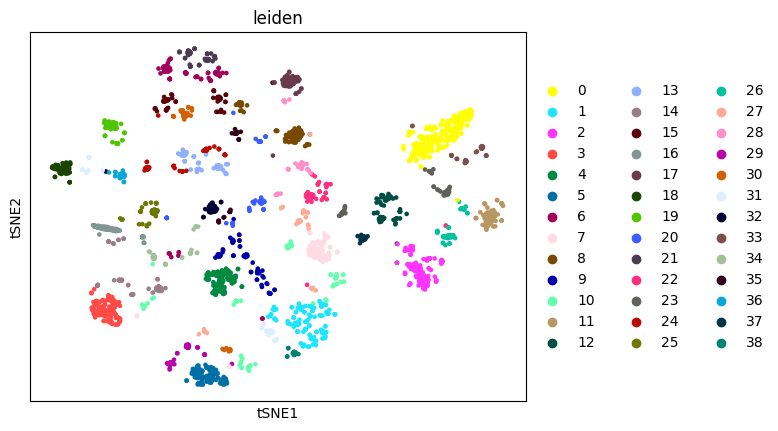

<Figure size 640x480 with 0 Axes>

In [122]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color="leiden")


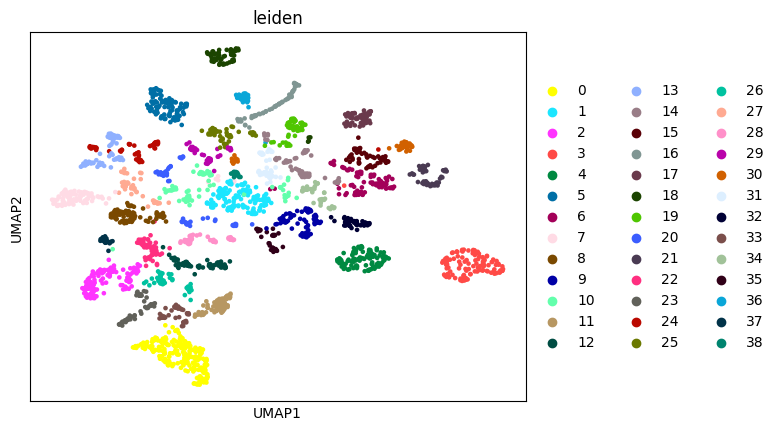

In [76]:
#dimensionality reduction
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden")

In [109]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scanpy\tools\_rank_gene

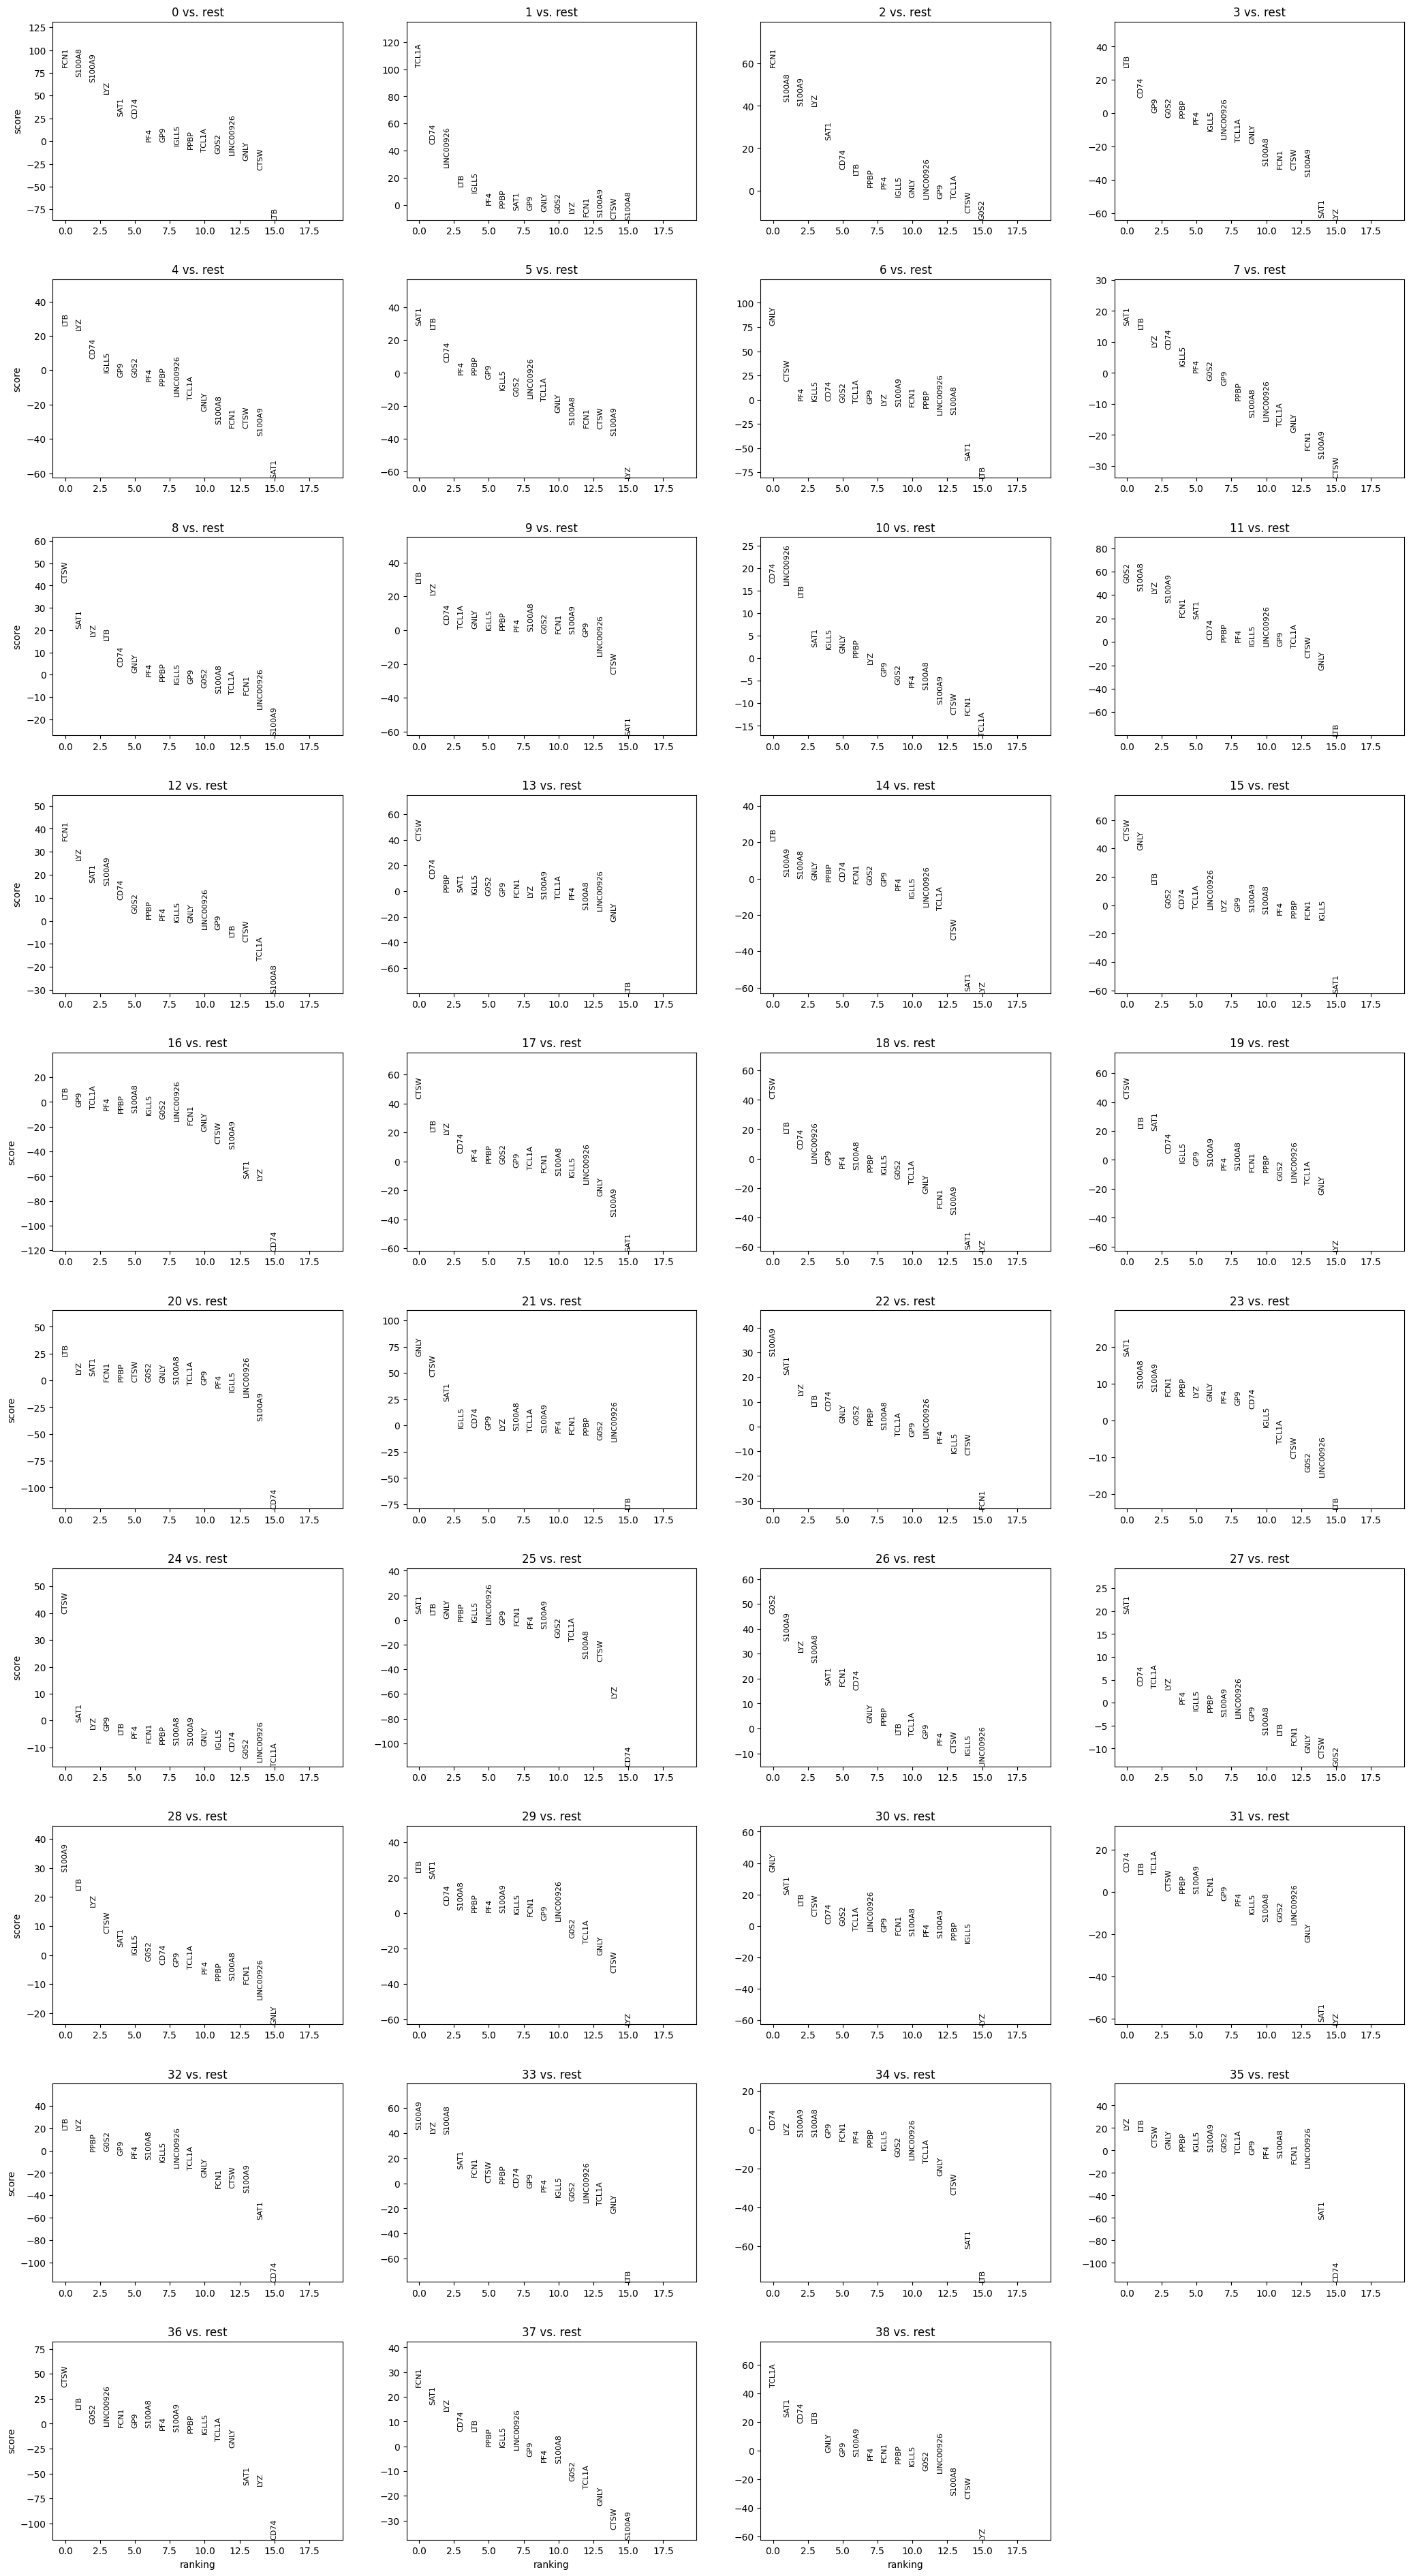

In [90]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [93]:
print(adata.obs.columns)

Index(['n_genes', 'leiden'], dtype='object')


In [95]:
print(adata.var_names[:10])

Index(['S100A9', 'S100A8', 'G0S2', 'GNLY', 'GP9', 'PF4', 'PPBP', 'CD74', 'LTB',
       'SAT1'],
      dtype='object', name='index')


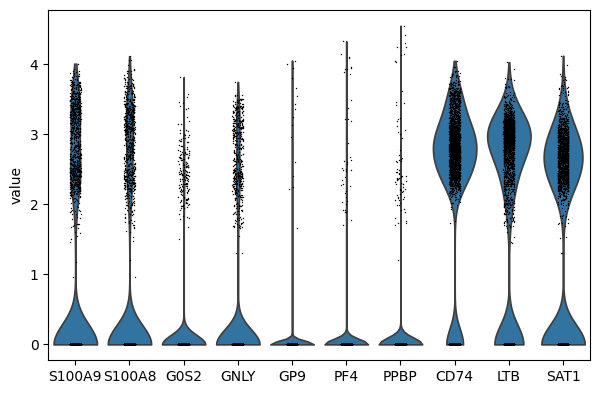

In [99]:
sc.pl.violin(adata, ['S100A9', 'S100A8', 'G0S2', 'GNLY', 'GP9', 'PF4', 'PPBP', 'CD74', 'LTB',
       'SAT1'])

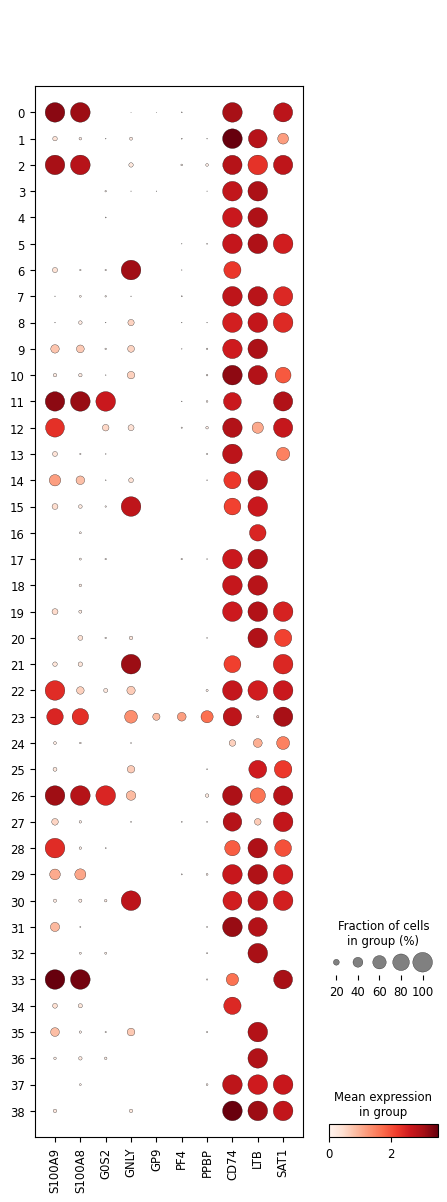

In [102]:
sc.pl.dotplot(adata, var_names= ['S100A9', 'S100A8', 'G0S2', 'GNLY', 'GP9', 'PF4', 'PPBP', 'CD74', 'LTB',
       'SAT1'], groupby="leiden")

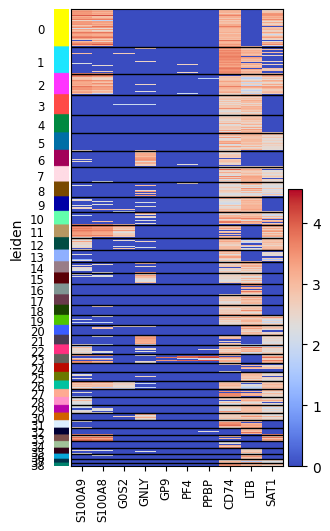

In [105]:
sc.pl.heatmap(adata, var_names= ['S100A9', 'S100A8', 'G0S2', 'GNLY', 'GP9', 'PF4', 'PPBP', 'CD74', 'LTB',
       'SAT1'], groupby="leiden", cmap='coolwarm')

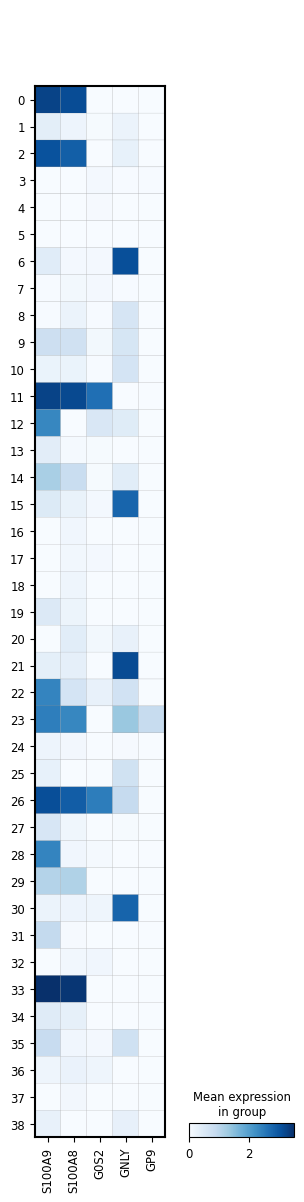

In [123]:
sc.pl.matrixplot(adata, var_names= ['S100A9', 'S100A8', 'G0S2', 'GNLY', 'GP9'], groupby="leiden", cmap="Blues")

In [111]:
print(adata.uns.keys())

odict_keys(['log1p', 'hvg', 'pca', 'tsne', 'neighbors', 'leiden', 'leiden_colors', 'umap', 'rank_genes_groups'])


In [117]:
import pandas as pd
marker_genes = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])
marker_genes.to_csv("pbmc3k_sce_scanpy_marker_genes.csv", index=False)

In [115]:
import os

current_directory = os.getcwd()
print(current_directory)

C:\Users\Asus\Desktop\machine learning\jupyter
